In [21]:
from scipy.io import wavfile

In [22]:
import matplotlib.pyplot as plt

In [23]:
import numpy as np

In [24]:
wav_file = "./Collection - 10.07.21 - Cleaned_Data/mimosa_nosound-17.30.12.wav"

In [26]:
samplerate, data = wavfile.read(wav_file)


In [27]:
length = int(len(data/ samplerate))

In [28]:
start = 0 

In [29]:
finish = samplerate

In [30]:
new_data = np.array([])

In [31]:
while start < len(data):
    data_new = data[start:finish]
    snippet_mean = np.mean(data_new)
    new_data = np.append(new_data, [snippet_mean])
    start = start + samplerate
    finish = finish + samplerate

In [32]:
transformed_data = new_data[0:len(new_data) - 1]

In [38]:
print(len(new_data))

903


In [40]:
split_array = np.array_split(new_data, 15)

In [46]:
print(len(split_array[0]))

61


In [52]:
np.mean(split_array[5])

-97.22200666666667

In [57]:
nyq = 0.5 *samplerate

In [59]:
low_cut = 0

In [60]:
high_cut = 20

In [61]:
low = low_cut/nyq

In [62]:
high = high_cut/nyq

In [422]:
from scipy import signal

In [423]:
np.mean(new_data)

-68.37101822884516

In [424]:
b, a = signal.butter(20, 0.1, 'low')
filteredData = signal.filtfilt(b, a, new_data) #data is the signal to be filtered

In [425]:
np.mean(filteredData)

-33.716592785555676

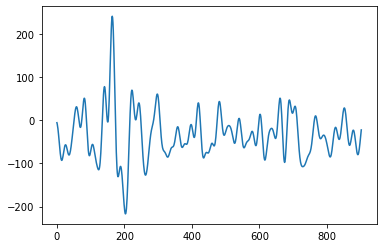

In [426]:
plt.plot(filteredData)

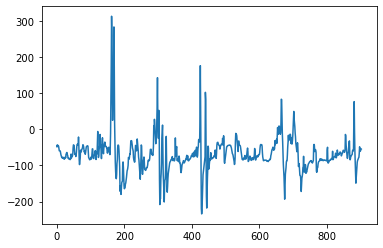

In [427]:
plt.plot(new_data)

In [428]:
print(len(filteredData))

903


In [429]:
split_array = np.array_split(filteredData, 15)

In [430]:
np.mean(split_array[5])

-52.20720619788029

In [431]:
from scipy.stats import skew

In [432]:
i = 0
while i < len(split_array):
    mean = np.mean(split_array[i])
    std = np.std(split_array[i])
    print(std)
    i = i + 1

37.98684134384851
48.72887184012684
109.945381467852
96.73520201234676
62.169314754041956
27.84968469618586
30.009827059007566
37.77989604514747
21.117917857743514
19.623658026684662
35.76493213473072
48.48121827951636
40.36897129658111
19.855511597528004
31.76533894921205


In [433]:
 i = 0
while i < len(split_array):
    skew_value = skew(split_array[i])
    print(skew_value)
    i = i + 1


0.7658649114908502
0.19801192243113339
0.3397904776471658
-0.10410899141941304
-0.15304175777141252
0.9333101674817201
0.9904600321892479
1.1568171642987557
0.6724970705494192
0.9695523527280795
0.29885919306730563
-0.554595808819679
0.2915766202575929
-0.5888559257424809
0.40366735267885384


In [434]:
from scipy.stats import kurtosis


In [435]:
 i = 0
while i < len(split_array):
    kurtosis_value = kurtosis(split_array[i])
    print(kurtosis_value)
    i = i + 1

-0.6891375854974084
-1.285011031165076
-0.8186439768184051
-1.4992636239837183
-1.3325512600824367
0.11586165030499052
-0.01702759634668638
0.1283059080148914
0.4926054039399248
0.3202797645458224
-0.05857221939572366
-1.216681411775685
-1.348407513246979
-0.7051641256924235
-0.8477858976595178


In [436]:
corr = signal.correlate(split_array[2], split_array[4])

In [437]:
lags = signal.correlation_lags(len(split_array[2]), len(split_array[4]))
corr /= np.max(corr)

0.5


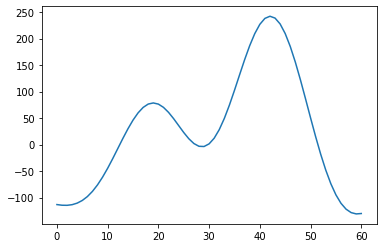

In [438]:
plt.plot(split_array[2])
print(np.mean(lags))

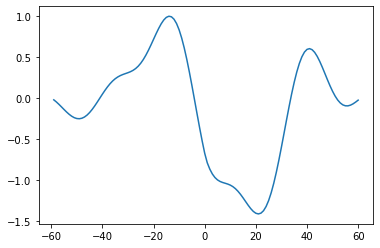

In [439]:
plt.plot(lags, corr)


In [440]:
fft_convolve = signal.fftconvolve(split_array[2], split_array[4])

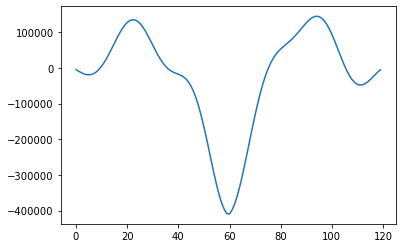

In [441]:
plt.plot(fft_convolve)

In [442]:
max = signal.argrelmax(split_array[2])
print(max)

(array([19, 42], dtype=int64),)


[19 42]


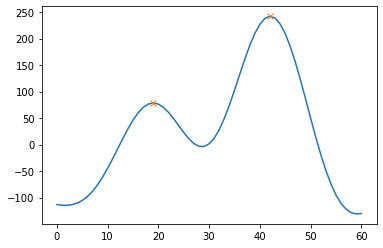

In [479]:
peaks, _ = signal.find_peaks(split_array[2], height=0)
plt.plot(split_array[2])
plt.plot(peaks, split_array[2][peaks], "x")
print(peaks)

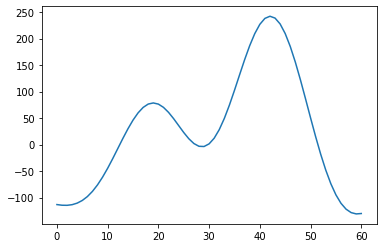

In [444]:
plt.plot(split_array[2])

In [445]:
csv_file_decibel = "./Collection - 10.07.21 - Cleaned_Data/mimosa_nosound-17.30.12_decibel.csv"

In [446]:
import pandas as pd

In [456]:
decibel_df = pd.read_csv(csv_file_decibel)

In [457]:
conv_arr= decibel_df.values

In [473]:
decibel = np.delete(conv_arr,[0],axis=1) 
decibel = decibel.ravel()

In [475]:
decibel_split_array = np.array_split(decibel, 15)

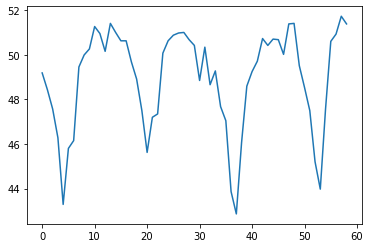

In [476]:
plt.plot(decibel_split_array[2])

[10 13 27 31 33 42 44 48 57]


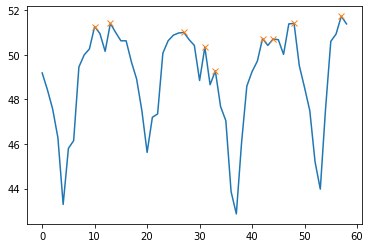

In [480]:
peaks, _= signal.find_peaks(decibel_split_array[2], height=0)
plt.plot(decibel_split_array[2])
plt.plot(peaks, decibel_split_array[2][peaks], "x")

print(peaks)